In [78]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
import warnings

In [2]:
df = pd.read_csv('extractRF_Case_1712.csv', encoding='latin-1')

In [3]:
df.shape

(10000, 37)

In [4]:
df.head(1)

ID  CASENUMBER STATUS ORIGIN  \
0  5001O00001celx5QAA      804591    New    Web   

                               SUBJECT  PRIORITY  \
0  Help with Creating User Permissions  3-Medium   

                                         DESCRIPTION CLOSEDDATE  \
0  Support can you help or point me in the right ...        NaN   

               SLASTARTDATE SLAEXITDATE  ...  \
0  2019-12-17T14:16:17.000Z         NaN  ...   

  PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C  \
0                                        0.03   

  PENDING_ENGINEERING_CUMULATIVE_TIME__C  \
0                                    0.0   

  SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C  \
0                                    NaN   

  SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C SC_SERVICE_PRODUCT_FAMILY__C  \
0                                        NaN            HELIX REMEDYFORCE   

  OPERATIONAL_GEO__C FIX_PACK_VERSION__C  CASE_SUMMARY_LAST_UPDATED__C  \
0                NaN                 NaN                           NaN   

  ACTIVE_GCC__C SUBMITTED_HOUR_GMT__C  
0      Non-APAC                  14.0  

[1 rows x 37 columns]

In [5]:
df.columns

Index(['ID', 'CASENUMBER', 'STATUS', 'ORIGIN', 'SUBJECT', 'PRIORITY',
       'DESCRIPTION', 'CLOSEDDATE', 'SLASTARTDATE', 'SLAEXITDATE',
       'CREATEDDATE', 'MILESTONESTATUS', 'DR_VERSION__C', 'MANAGER_NAME__C',
       'QUEUE_PRODUCT_GROUP__C', 'SERVICE_LEVEL__C', 'SEVERITY__C',
       'CASE_AGGRAVATION__C', 'SC_CURRENT_CASE_QUEUE_NAME__C',
       'SC_CONTACT_COMPANY_HL__C', 'SC_LP_VERSION_CODE_HL__C',
       'SLA_EXPIRATION__C', 'SLA_PRIORITIZATION__C', 'SC_CASESUMMARY__C',
       'ACCOUNT_NAME__C', 'CUSTOMER_STATUS_AGE__C',
       'PENDING_CLIENT_CUMULATIVE_TIME__C',
       'PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C',
       'PENDING_ENGINEERING_CUMULATIVE_TIME__C',
       'SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C',
       'SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C',
       'SC_SERVICE_PRODUCT_FAMILY__C', 'OPERATIONAL_GEO__C',
       'FIX_PACK_VERSION__C', 'CASE_SUMMARY_LAST_UPDATED__C', 'ACTIVE_GCC__C',
       'SUBMITTED_HOUR_GMT__C'],
      dtype='object')

In [6]:
#df.iloc[6].SLA_EXPIRATION__C - df.iloc[6].SLASTARTDATE

In [7]:
dt1 = df.iloc[31].SLA_EXPIRATION__C

In [8]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [9]:
#to_integer(datetime.date(dt1))

In [10]:
dt = df.iloc[29].SLA_EXPIRATION__C
dt = dt.replace('T', ' ').replace('Z', '')[:-4]
print(dt)

2019-12-15 16:00:00


In [11]:
dt1 = df.iloc[29].SLAEXITDATE
dt1 = dt1.replace('T', ' ').replace('Z', '')[:-4]
print(dt1)
#to_integer(datetime.date(dt1))

2019-12-17 10:02:22


In [12]:
datetime_object = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
print(datetime_object)

datetime_object1 = datetime.strptime(dt1, '%Y-%m-%d %H:%M:%S')
print(datetime_object1)

asd = datetime_object - datetime_object1
print(asd)
print(asd.days)

to_integer(datetime.date(datetime_object))

2019-12-15 16:00:00
2019-12-17 10:02:22
-2 days, 5:57:38
-2


20191215

In [13]:
df['SLA_ExpirationDate'] = df.SLA_EXPIRATION__C.apply(lambda x: str(x).replace('T', ' ').replace('Z', '')[:-4])
df['SLA_ExitDate'] = df.SLAEXITDATE.apply(lambda x: str(x).replace('T', ' ').replace('Z', '')[:-4])
df['SLA_StartDate'] = df.SLASTARTDATE.apply(lambda x: str(x).replace('T', ' ').replace('Z', '')[:-4])

In [14]:
#df['SLA_ExpirationINT'] = df['SLA_ExpirationDate'].astype(int)

In [15]:
df.head(1)

ID  CASENUMBER STATUS ORIGIN  \
0  5001O00001celx5QAA      804591    New    Web   

                               SUBJECT  PRIORITY  \
0  Help with Creating User Permissions  3-Medium   

                                         DESCRIPTION CLOSEDDATE  \
0  Support can you help or point me in the right ...        NaN   

               SLASTARTDATE SLAEXITDATE  ...  \
0  2019-12-17T14:16:17.000Z         NaN  ...   

  SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C SC_SERVICE_PRODUCT_FAMILY__C  \
0                                        NaN            HELIX REMEDYFORCE   

  OPERATIONAL_GEO__C FIX_PACK_VERSION__C CASE_SUMMARY_LAST_UPDATED__C  \
0                NaN                 NaN                          NaN   

  ACTIVE_GCC__C SUBMITTED_HOUR_GMT__C   SLA_ExpirationDate SLA_ExitDate  \
0      Non-APAC                  14.0  2019-12-17 18:16:00                

         SLA_StartDate  
0  2019-12-17 14:16:17  

[1 rows x 40 columns]

In [16]:
df['SLA_ExpirationDate']= pd.to_datetime(df['SLA_ExpirationDate'])
df['SLA_ExitDate']= pd.to_datetime(df['SLA_ExitDate'])
df['SLA_StartDate']= pd.to_datetime(df['SLA_StartDate'])

In [17]:
x = np.timedelta64(asd, 'ns')
print(x.dtype)
days = x.astype('timedelta64[D]')
sdatu = days / np.timedelta64(1, 'D')
print(sdatu.dtype)

timedelta64[ns]
float64


In [18]:
df['SLA_diff'] = df['SLA_ExpirationDate'] - df['SLA_ExitDate']
df['SLA_diff'] = df['SLA_diff'].apply(lambda x : x.days)

In [19]:
df.head(1)

ID  CASENUMBER STATUS ORIGIN  \
0  5001O00001celx5QAA      804591    New    Web   

                               SUBJECT  PRIORITY  \
0  Help with Creating User Permissions  3-Medium   

                                         DESCRIPTION CLOSEDDATE  \
0  Support can you help or point me in the right ...        NaN   

               SLASTARTDATE SLAEXITDATE  ... SC_SERVICE_PRODUCT_FAMILY__C  \
0  2019-12-17T14:16:17.000Z         NaN  ...            HELIX REMEDYFORCE   

  OPERATIONAL_GEO__C FIX_PACK_VERSION__C CASE_SUMMARY_LAST_UPDATED__C  \
0                NaN                 NaN                          NaN   

  ACTIVE_GCC__C SUBMITTED_HOUR_GMT__C  SLA_ExpirationDate  SLA_ExitDate  \
0      Non-APAC                  14.0 2019-12-17 18:16:00           NaT   

        SLA_StartDate SLA_diff  
0 2019-12-17 14:16:17      NaN  

[1 rows x 41 columns]

In [20]:
modules = ['CMDB', 'Console', 'Smart Sync', 'SLA', 'Service Request', 'Request Definition', 'Self Service', 'Pentaho',
          'Template', 'Category', 'Usage Metric', 'SRD', 'Service Target', 'Task', 'Broadcast', 'Change Request', 
          'Incident', 'Approval', 'Lookup', 'CPU Time', 'KA', 'Knowledge Article', 'Workflow', 'DmlException', 'BCM',
          'Integration', 'Activity Feed', 'Smart Suggestion', 'Upgrade', 'REST API', 'Discovery', 'Scheduled Job', 
          'System.LimitException:', 'Tasks Closed Controller', 'Email Listener', 'lightning', 'Delegated Approver', 
          'time based workflow', 'report', 'FIELD_CUSTOM_VALIDATION_EXCEPTION', 'Task Template', 'System.DmlException:',
          'Primary Client','SSO']

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [22]:
stopwords_EN  = set(stopwords.words('english'))
pst = PorterStemmer()

In [23]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
cleaned_text = []
clean = []
url = 'http, www.'
spl_char = '\', --, -, [, ], \n, (, ), \, ,?' #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
module = []
for sentence in df.DESCRIPTION:
    temp_mod = set()
    sentence = str(sentence)
    #sentence = str(sentence.encode("latin-1"), "windows-1252")
    str2 = re.findall('.*Error:.*',sentence)
    sentence = sentence.replace('lightening','lightning')
    sentence = sentence.replace('Remedyforce Version:','')
    sentence = sentence.replace('\'','')
    sentence = sentence.replace(',','')
    str4 = re.findall('(\w*00D\w*)|(\w*00d\w*)]', sentence)
    if len(str4) > 0:
        if str4[0][0] == '':
            sentence = sentence.replace(str4[0][1], '')
        elif str4[0][1] == '':
            sentence = sentence.replace(str4[0][0], '')
    sentence = sentence + str(str2)
    #cleaned_text = re.sub(r'\d+', '', sentence)
    for item in modules:
        item1 = ' ' +item.lower() + ' '
        sentence1 = sentence.lower()
        if item1 in sentence1:
            temp_mod.add(item+'$$')
    cleaned_text = [word for word in sentence.split() if word not in punctuation]
    cleaned_text = [word for word in cleaned_text if word not in url]
    cleaned_text = [word for word in cleaned_text if word not in stopwords_EN]
    cleaned_text = [word for word in cleaned_text if word not in spl_char]
    #cleaned_text = [pst.stem(word) for word in cleaned_text]
    module.append(' '.join(temp_mod))
    clean.append(' '.join(cleaned_text))
#print(clean)

In [25]:
df['Module'] = module
df['cleaned_text'] = clean

In [26]:
df.Module = df.Module.apply(lambda x:x.replace('$$ ',',').replace('$$',''))

In [27]:
df.head()

ID  CASENUMBER                     STATUS ORIGIN  \
0  5001O00001celx5QAA      804591                        New    Web   
1  5001O00001celw7QAA      804586                        New  Email   
2  5001O00001celruQAA      804563  Work In Progress-Customer    Web   
3  5001O00001celr6QAA      804557                        New  Email   
4  5001O00001celmGQAQ      804525                     Closed    Web   

                                             SUBJECT  PRIORITY  \
0                Help with Creating User Permissions  3-Medium   
1  Knowledge search snake slow and articles not d...  3-Medium   
2                                  Emails Being Lost  3-Medium   
3                                   Remedyforce Help  3-Medium   
4                       Email to Remedyforce failing  3-Medium   

                                         DESCRIPTION  \
0  Support can you help or point me in the right ...   
1  When we use Knowledge search it is extremely s...   
2  Hi,\n\nWe have a forwarder for mails sent to m...   
3  Good morning,\n\nEvery time there is a new hir...   
4  When email is sent to Remedyforce it generates...   

                 CLOSEDDATE              SLASTARTDATE  \
0                       NaN  2019-12-17T14:16:17.000Z   
1                       NaN  2019-12-17T14:17:04.000Z   
2                       NaN  2019-12-17T13:51:51.000Z   
3                       NaN  2019-12-17T13:51:10.000Z   
4  2019-12-17T13:30:03.000Z  2019-12-17T13:08:48.000Z   

                SLAEXITDATE  ... FIX_PACK_VERSION__C  \
0                       NaN  ...                 NaN   
1                       NaN  ...                 NaN   
2                       NaN  ...                 NaN   
3                       NaN  ...                 NaN   
4  2019-12-17T13:30:04.000Z  ...                 NaN   

  CASE_SUMMARY_LAST_UPDATED__C ACTIVE_GCC__C SUBMITTED_HOUR_GMT__C  \
0                          NaN      Non-APAC                  14.0   
1                          NaN      Non-APAC                  14.0   
2                          NaN      Non-APAC                  13.0   
3                          NaN      Non-APAC                  13.0   
4     2019-12-17T13:25:15.000Z      Non-APAC                  13.0   

   SLA_ExpirationDate        SLA_ExitDate       SLA_StartDate  SLA_diff  \
0 2019-12-17 18:16:00                 NaT 2019-12-17 14:16:17       NaN   
1 2019-12-17 18:17:00                 NaT 2019-12-17 14:17:04       NaN   
2 2019-12-17 15:51:00                 NaT 2019-12-17 13:51:51       NaN   
3 2019-12-17 17:51:00                 NaT 2019-12-17 13:51:10       NaN   
4 2019-12-17 14:08:48 2019-12-17 13:30:04 2019-12-17 13:08:48       0.0   

           Module                                       cleaned_text  
0            CMDB  Support help point right direction create user...  
1                  When use Knowledge search extremely slow also ...  
2  Email Listener  Hi We forwarder mails sent mysupport.iberia@pe...  
3        Approval  Good morning Every time new hire termination s...  
4                  When email sent Remedyforce generates failure....  

[5 rows x 43 columns]

In [28]:
#df.to_excel('CaseModules.xlsx')

In [29]:
X = input("Enter the details of New Case : ").lower()

Enter the details of New Case : Issue: After the customer refreshed his sanbox he is getting the folllowing error when the user goes to the Remedyforce CMDB   Unexpected end-of-input: was expecting closing '""' for name at [line:1, column:511] An unexpected error has occurred. Your solution provider has been notified. (System)


In [30]:
clean_input = []
url = 'http, www.'
spl_char = '\', --, -, [, ], \n, (, ), \, ,?' #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~

sentence = str(X.encode("latin-1"), "windows-1252")

str2 = re.findall('.*Error:.*',sentence)
if 'Steps to Reproduce' in sentence:
    sentence = sentence.split('Steps to Reproduce')[0]
if 'steps to reproduce' in sentence:
    sentence = sentence.split('steps to reproduce')[0]
if 'Steps to reproduce' in sentence:
    sentence = sentence.split('Steps to reproduce')[0]
#sentence = sentence.split('Steps to reproduce')[0]
sentence = sentence.split('Apex Class:')[0]
sentence = sentence.replace('Remedyforce Version:','')
sentence = sentence.replace('Summary/Error of issue:','')
sentence = sentence.replace('\'','')
str4 = re.findall('(\w*00D\w*)|(\w*00d\w*)]', sentence)
if len(str4) > 0:
    if str4[0][0] == '':
        sentence = sentence.replace(str4[0][1], '')
    elif str4[0][1] == '':
        sentence = sentence.replace(str4[0][0], '')
sentence = sentence + str(str2)
#cleaned_text = re.sub(r'\d+', '', sentence)
input_mod = set()
for item in modules:
    item1 = ' ' +item.lower() + ' '
    sentence1 = sentence.lower()
    if item1 in sentence1:
        input_mod.add(item)
cleaned_input = [word for word in sentence.split() if word not in punctuation]
cleaned_input = [word for word in cleaned_input if word not in url]
cleaned_input = [word for word in cleaned_input if word not in stopwords_EN]
cleaned_input = [word for word in cleaned_input if word not in spl_char]
clean_input.append(' '.join(cleaned_input))
clean_input

['issue: customer refreshed sanbox getting folllowing error user goes remedyforce cmdb unexpected end-of-input: expecting closing "" name [line:1, column:511] unexpected error occurred. solution provider notified. (system)[]']

In [31]:
input_mod = list(input_mod)
print(input_mod)

['CMDB']


In [32]:
sw = stopwords.words('english') 
X_list = word_tokenize(X) 
X_set = {w for w in X_list if not w in sw}
clean = []
for texts in df.cleaned_text:
    l1 = []
    lst = []
    #name = df[df.cleaned_text == texts].NAME
    #print('RFA NAme is :', name)
    text_list = word_tokenize(texts)
    text_set = {w for w in text_list if not w in sw} 
    rvector = X_set.union(text_set)
    
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in text_set: lst.append(1) 
        else: lst.append(0) 
    c = 0
    
    for i in range(len(rvector)): 
        c+= l1[i]*lst[i] 
    cosine = c / float((sum(l1)*sum(lst))**0.5)
    clean.append((np.round(cosine,4)))

In [33]:
df['Similarity Index'] = clean

In [34]:
#df.to_excel('CaseSim.xlsx')

In [35]:
df = df.sort_values('Similarity Index', ascending=False)

In [36]:
i = -1
max_sim = 1
for item in df.Module:
    i += 1
    if len(input_mod) > 0:
        if input_mod[0] in item:
            max_sim = df.iloc[i]['Similarity Index']
            break
print('max_sim', max_sim)

max_sim 0.4527


In [37]:
adjusted_param1 = (1-max_sim)*.7
adjusted_param2 = (1-max_sim)*.4
print('adjusted_param1', adjusted_param1)
print('adjusted_param2', adjusted_param2)

adjusted_param1 0.38311
adjusted_param2 0.21892


In [38]:
suggestedDF = df.reset_index()

In [39]:
i = -1
for item in suggestedDF.Module:
    i += 1
    if len(input_mod) > 0:
        if input_mod[0] in item:
            suggestedDF.at[i,'Similarity Index'] = suggestedDF.at[i,'Similarity Index']+ adjusted_param1
        else:
            suggestedDF.at[i,'Similarity Index'] = suggestedDF.at[i,'Similarity Index']+ adjusted_param2

In [40]:
suggestedDF = suggestedDF.sort_values('Similarity Index', ascending=False).head(20)
suggestedDF.head(3)

index                  ID  CASENUMBER  STATUS ORIGIN  \
1     673  5001O00001ccgqwQAA      778418  Closed    Web   
9     747  5001O00001ccT7SQAU      775986  Closed    Web   
12    812  5001O00001ccF6KQAU      773664  Closed    Web   

                           SUBJECT  PRIORITY  \
1   Error when accessing CMDB  tab  3-Medium   
9                Can't access CMDB  3-Medium   
12           Error message in CMDB  3-Medium   

                                          DESCRIPTION  \
1   We are receiving errors when trying to access ...   
9   Every time I am accessing the CMDB in our sand...   
12  Dear all, on sandbox environment (org ID : 00D...   

                  CLOSEDDATE              SLASTARTDATE  ...  \
1   2019-11-04T08:46:17.000Z  2019-10-24T08:02:44.000Z  ...   
9   2019-10-28T11:43:21.000Z  2019-10-18T15:47:04.000Z  ...   
12  2019-11-11T04:41:23.000Z  2019-10-15T07:46:14.000Z  ...   

   CASE_SUMMARY_LAST_UPDATED__C ACTIVE_GCC__C SUBMITTED_HOUR_GMT__C  \
1      2019-10-25T07:37:14.000Z      Non-APAC                   8.0   
9      2019-10-22T18:16:15.000Z      Non-APAC                  15.0   
12     2019-10-17T06:30:33.000Z          APAC                   7.0   

    SLA_ExpirationDate        SLA_ExitDate       SLA_StartDate SLA_diff  \
1  2019-10-24 12:02:00 2019-11-04 08:46:18 2019-10-24 08:02:44    -11.0   
9  2019-10-18 19:47:00 2019-10-28 11:43:21 2019-10-18 15:47:04    -10.0   
12 2019-10-15 11:46:00 2019-11-11 04:41:24 2019-10-15 07:46:14    -27.0   

            Module                                       cleaned_text  \
1             CMDB  We receiving errors trying access CMDB tab one...   
9             CMDB  Every time I accessing CMDB sandbox errors fol...   
12  CMDB,lightning  Dear sandbox environment (org ID access CMDB w...   

   Similarity Index  
1           0.83581  
9           0.76891  
12          0.76051  

[3 rows x 45 columns]

In [41]:
df.drop(['ID','MILESTONESTATUS', 'DR_VERSION__C', 'MANAGER_NAME__C', 'PRIORITY', 'QUEUE_PRODUCT_GROUP__C', 
         'SC_CURRENT_CASE_QUEUE_NAME__C', 'SC_CONTACT_COMPANY_HL__C', 'SC_SERVICE_PRODUCT_FAMILY__C',
        'OPERATIONAL_GEO__C', 'FIX_PACK_VERSION__C'], axis=1, inplace=True)

In [42]:
df = df[(df.SLA_PRIORITIZATION__C == 'Finished - Met') | (df.SLA_PRIORITIZATION__C == 'Finished - Missed')]

In [43]:
df.shape

(9955, 33)

In [44]:
catColumns = []
test = df.nunique()
for k, v in enumerate(test):
    if(v < 25):
        catColumns.append(df.columns[k])
catColumns

['STATUS',
 'ORIGIN',
 'SERVICE_LEVEL__C',
 'SEVERITY__C',
 'SC_LP_VERSION_CODE_HL__C',
 'SLA_PRIORITIZATION__C',
 'ACTIVE_GCC__C',
 'SUBMITTED_HOUR_GMT__C']

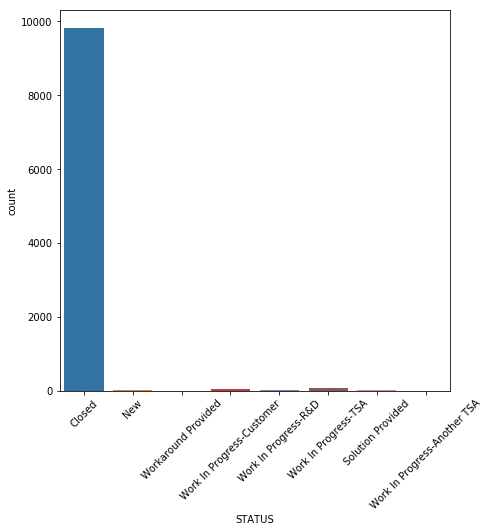

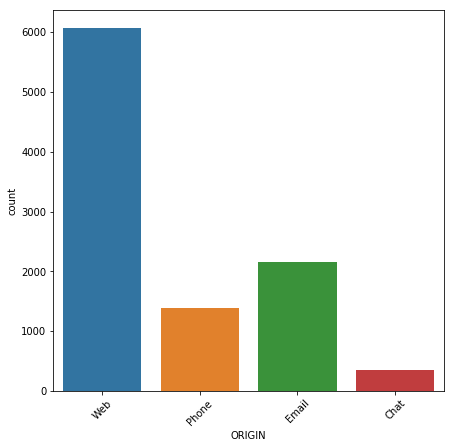

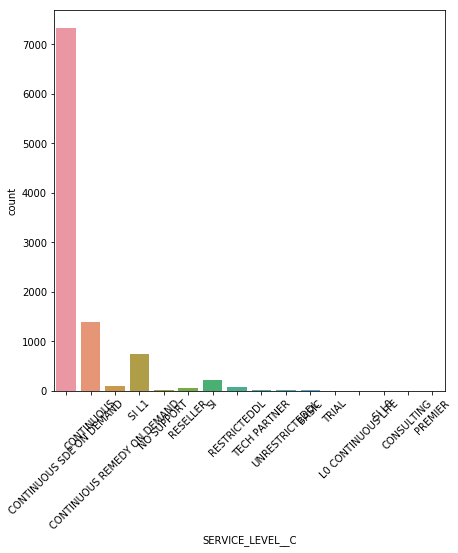

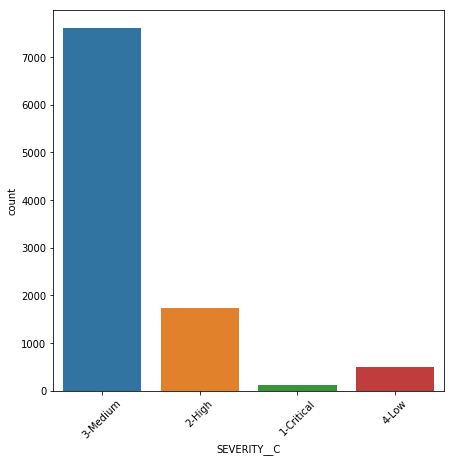

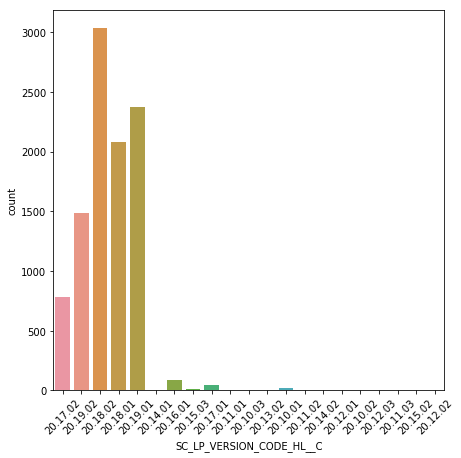

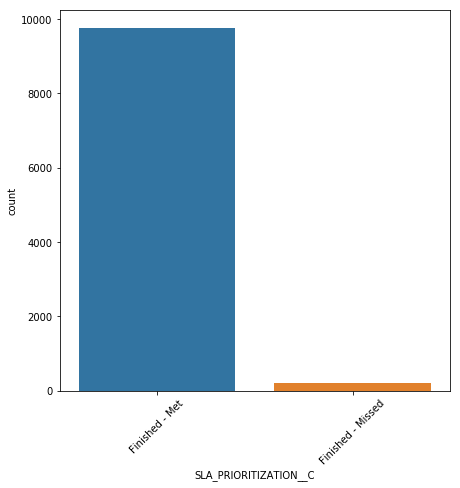

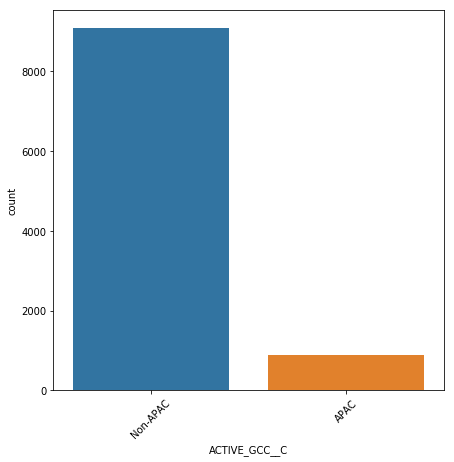

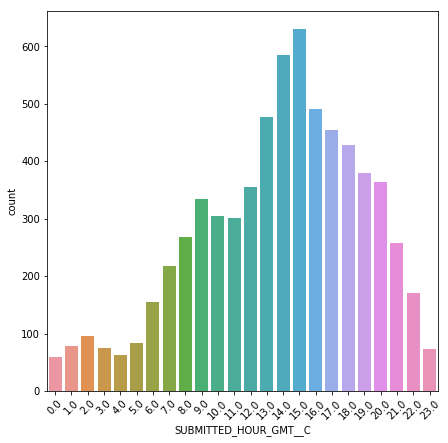

In [45]:
for i, item in enumerate(catColumns):
    plt.figure(figsize=(7,7))
    chart = sns.countplot(df[item])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [46]:
le = preprocessing.LabelEncoder()
df['SLA_PRIORITIZATION__C'] = le.fit_transform(df.SLA_PRIORITIZATION__C.values)

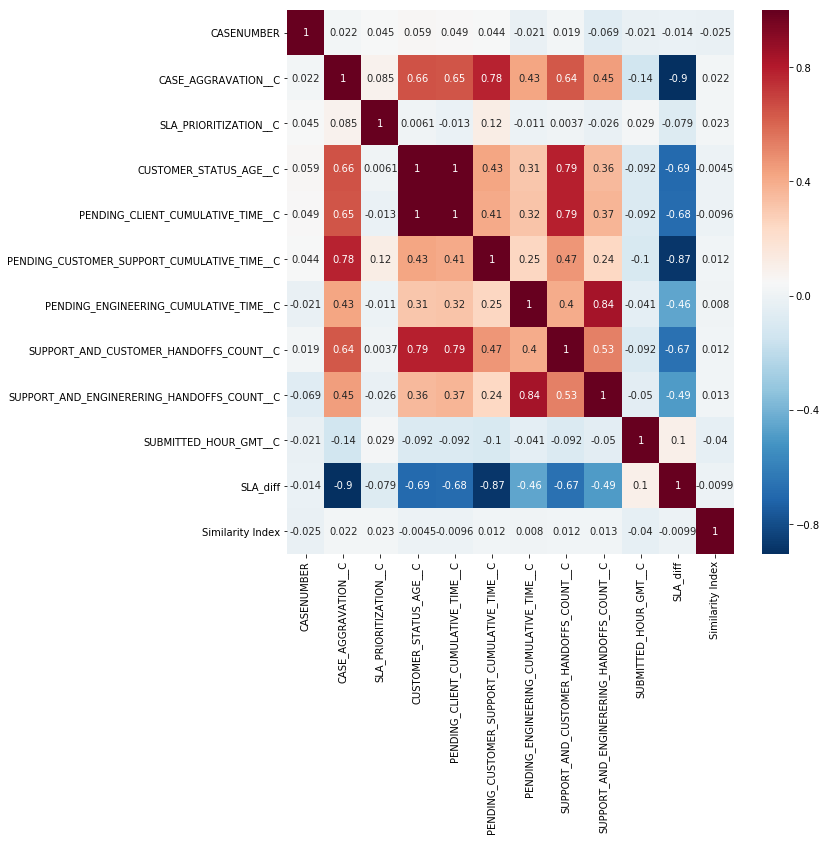

In [47]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.show()

In [48]:
df = pd.get_dummies(df, columns=['STATUS', 'ORIGIN', 'SEVERITY__C', 'SUBMITTED_HOUR_GMT__C','ACTIVE_GCC__C','Module'])

In [49]:
df.shape

(9955, 714)

In [50]:
df.head(2)

CASENUMBER                                       SUBJECT  \
9005      499251  Can not access One of my request definitions   
673       778418                Error when accessing CMDB  tab   

                                            DESCRIPTION  \
9005  Get this error:\n\nAttempt to de-reference a n...   
673   We are receiving errors when trying to access ...   

                    CLOSEDDATE              SLASTARTDATE  \
9005  2018-03-29T17:05:41.000Z  2018-03-27T19:18:33.000Z   
673   2019-11-04T08:46:17.000Z  2019-10-24T08:02:44.000Z   

                   SLAEXITDATE               CREATEDDATE  \
9005  2018-03-29T17:05:42.000Z  2018-03-27T19:18:33.000Z   
673   2019-11-04T08:46:18.000Z  2019-10-24T08:02:44.000Z   

              SERVICE_LEVEL__C  CASE_AGGRAVATION__C SC_LP_VERSION_CODE_HL__C  \
9005  CONTINUOUS SDE ON DEMAND                 1.91                 20.17.02   
673   CONTINUOUS SDE ON DEMAND                11.03                 20.19.02   

      ... Module_report,Template,Category  \
9005  ...                               0   
673   ...                               0   

      Module_report,Template,Change Request,Approval  \
9005                                               0   
673                                                0   

     Module_report,Template,Incident,Category  \
9005                                        0   
673                                         0   

     Module_report,Template,Request Definition  \
9005                                         0   
673                                          0   

      Module_report,Template,Request Definition,Service Request  \
9005                                                  0           
673                                                   0           

      Module_report,Template,Request Definition,Task  Module_report,Upgrade  \
9005                                               0                      0   
673                                                0                      0   

      Module_report,Workflow  Module_report,lightning  \
9005                       0                        0   
673                        0                        0   

      Module_time based workflow,Workflow,Change Request  
9005                                                  0   
673                                                   0   

[2 rows x 714 columns]

In [51]:
df.SLA_PRIORITIZATION__C.value_counts()

0    9750
1     205
Name: SLA_PRIORITIZATION__C, dtype: int64

In [52]:
from sklearn.utils import resample

In [53]:
df_majority = df[df.SLA_PRIORITIZATION__C==0]
df_minority = df[df.SLA_PRIORITIZATION__C==1]

In [54]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=9750,    # to match majority class
                                 random_state=42) # reproducible results

In [55]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [56]:
df_upsampled.SLA_PRIORITIZATION__C.value_counts()

1    9750
0    9750
Name: SLA_PRIORITIZATION__C, dtype: int64

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [58]:
#df.to_excel('caseModified.xlsx')

In [59]:
df_exp = df_upsampled.drop(['SUBJECT', 'DESCRIPTION', 'SC_LP_VERSION_CODE_HL__C', 'SC_CASESUMMARY__C', 
                  'ACCOUNT_NAME__C', 'CLOSEDDATE', 'SLASTARTDATE', 'SLAEXITDATE', 'CREATEDDATE', 'SERVICE_LEVEL__C',
                 'SC_LP_VERSION_CODE_HL__C','SLA_EXPIRATION__C', 'CASE_SUMMARY_LAST_UPDATED__C', 'SLA_ExpirationDate',
                  'SLA_ExitDate','SLA_StartDate'], axis=1)

In [60]:
df_exp = df_exp.drop(['cleaned_text', 'Similarity Index'], axis=1)

In [61]:
df_exp = df_exp.drop(['CUSTOMER_STATUS_AGE__C','SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C',
                      'SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C','SLA_diff'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [63]:
testData = df_exp[df_exp.CASENUMBER == 778418]
#testData = df_exp[df_exp.CASENUMBER == 803599]
testData = testData.drop(['SLA_PRIORITIZATION__C'], axis=1)

In [64]:
testData = testData.head(1)
testData.head()

CASENUMBER  CASE_AGGRAVATION__C  PENDING_CLIENT_CUMULATIVE_TIME__C  \
673      778418                11.03                                2.0   

     PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C  \
673                                         9.03   

     PENDING_ENGINEERING_CUMULATIVE_TIME__C  STATUS_Closed  STATUS_New  \
673                                     0.0              1           0   

     STATUS_Solution Provided  STATUS_Work In Progress-Another TSA  \
673                         0                                    0   

     STATUS_Work In Progress-Customer  ...  Module_report,Template,Category  \
673                                 0  ...                                0   

     Module_report,Template,Change Request,Approval  \
673                                               0   

     Module_report,Template,Incident,Category  \
673                                         0   

     Module_report,Template,Request Definition  \
673                                          0   

     Module_report,Template,Request Definition,Service Request  \
673                                                  0           

     Module_report,Template,Request Definition,Task  Module_report,Upgrade  \
673                                               0                      0   

     Module_report,Workflow  Module_report,lightning  \
673                       0                        0   

     Module_time based workflow,Workflow,Change Request  
673                                                  0   

[1 rows x 692 columns]

In [65]:
y = df_exp['SLA_PRIORITIZATION__C']
X = df_exp.drop(['SLA_PRIORITIZATION__C'], axis=1)

In [66]:
print(X.shape)
print(y.shape)

(19500, 692)
(19500,)


In [67]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [68]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(15600, 692)
(3900, 692)
(15600,)
(3900,)


In [69]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, Y_train)

C:\Users\hsinghvi\AppData\Local\Continuum\anaconda3x\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hsinghvi\AppData\Local\Continuum\anaconda3x\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [70]:
rf.oob_score_

0.9912820512820513

In [71]:
rf.score(X_validation, Y_validation)

0.9994871794871795

In [72]:
X_validation.head()

CASENUMBER  CASE_AGGRAVATION__C  PENDING_CLIENT_CUMULATIVE_TIME__C  \
195       796025                 7.19                               1.14   
937       770215                 2.35                               0.08   
7973      534904                 0.10                               0.00   
8092      530379                21.98                               0.29   
3221      693056                 9.12                               0.03   

      PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C  \
195                                          4.66   
937                                          1.10   
7973                                         0.09   
8092                                        10.70   
3221                                         8.96   

      PENDING_ENGINEERING_CUMULATIVE_TIME__C  STATUS_Closed  STATUS_New  \
195                                     1.39              1           0   
937                                     0.00              1           0   
7973                                    0.00              1           0   
8092                                    0.00              1           0   
3221                                    0.00              1           0   

      STATUS_Solution Provided  STATUS_Work In Progress-Another TSA  \
195                          0                                    0   
937                          0                                    0   
7973                         0                                    0   
8092                         0                                    0   
3221                         0                                    0   

      STATUS_Work In Progress-Customer  ...  Module_report,Template,Category  \
195                                  0  ...                                0   
937                                  0  ...                                0   
7973                                 0  ...                                0   
8092                                 0  ...                                0   
3221                                 0  ...                                0   

      Module_report,Template,Change Request,Approval  \
195                                                0   
937                                                0   
7973                                               0   
8092                                               0   
3221                                               0   

      Module_report,Template,Incident,Category  \
195                                          0   
937                                          0   
7973                                         0   
8092                                         0   
3221                                         0   

      Module_report,Template,Request Definition  \
195                                           0   
937                                           0   
7973                                          0   
8092                                          0   
3221                                          0   

      Module_report,Template,Request Definition,Service Request  \
195                                                   0           
937                                                   0           
7973                                                  0           
8092                                                  0           
3221                                                  0           

      Module_report,Template,Request Definition,Task  Module_report,Upgrade  \
195                                                0                      0   
937                                                0                      0   
7973                                               0                      0   
8092                                               0                      0   
3221                                               0                      0   

      Module_report,Workflow  Module_report,ligh

In [73]:
import pickle

In [74]:
filename = 'ClassModel.sav'
pickle.dump(rf, open(filename, 'wb'))

In [75]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)
result = loaded_model.score(X_validation, Y_validation)
print(result)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
0.9994871794871795


In [105]:
prob = loaded_model.predict_proba(testData)[0][0]
prob

1.0

In [106]:
rand = random.uniform(5, 12)

In [107]:
if(prob <0.22):
    prob = prob*100 + rand
else:
    prob = prob*100 - rand

In [108]:
prob

92.40955165551972

In [ ]:
warnings.filterwarnings("ignore")
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
for metric in metric_names:
    score1 = cross_val_score(rf, X, y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(rf, X, y, scoring=metric, cv=scv).mean()
    print('metric:: ', metric)
    print(score1)
    print(score2)
    print('\n')

In [ ]:
rand = random.uniform(0, 12)
test = 100 - rand
test